In [2]:
import pandas as pd
df=pd.read_csv("d:/learn/data/train3.csv") #csv 로딩
df.head()

,Pclass_1,Pclass_2,Pclass_3,Sex,Age,Fare,Survived
0,0,0,1,1,22.0,7.2500,0
1,1,0,0,0,38.0,71.2833,1
2,0,0,1,0,26.0,7.9250,1
3,1,0,0,0,35.0,53.1000,1
4,0,0,1,1,35.0,8.0500,0


In [3]:
df.columns #필드 목록

Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex', 'Age', 'Fare', 'Survived'], dtype='object')

In [4]:
df.shape #데이터의 형태

(891, 7)

In [5]:
df.describe() #기초 통계량

,Pclass_1,Pclass_2,Pclass_3,Sex,Age,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.242424,0.206510,0.551066,0.647587,29.758889,32.204208,0.383838
std,0.428790,0.405028,0.497665,0.477990,13.002570,49.693429,0.486592
min,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,22.000000,7.910400,0.000000
50%,0.000000,0.000000,1.000000,1.000000,30.000000,14.454200,0.000000
75%,0.000000,0.000000,1.000000,1.000000,35.000000,31.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,80.000000,512.329200,1.000000


In [6]:
df.groupby("Survived").mean() #생존자 구분별 평균값

,Pclass_1,Pclass_2,Pclass_3,Sex,Age,Fare
Survived,,,,,,
0,0.145719,0.176685,0.677596,0.852459,30.483607,22.117887
1,0.397661,0.254386,0.347953,0.318713,28.595526,48.395408


Text(0, 0.5, '빈도')

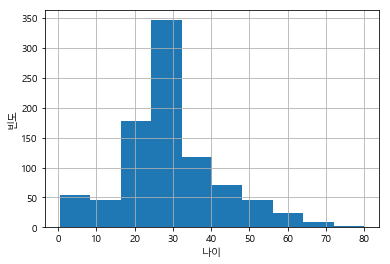

In [7]:
%matplotlib inline
#한글 폰트 설정
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

font_name=font_manager.FontProperties(
    fname="c:/windows/fonts/malgun.ttf").get_name()
rc("font",family=font_name)

df["Age"].hist() #히스토그램
plt.xlabel("나이")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

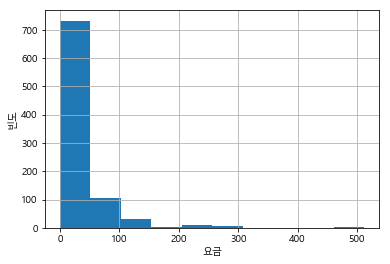

In [9]:
df["Fare"].hist()
plt.xlabel("요금")
plt.ylabel("빈도")

In [10]:
df["Survived"].value_counts()
#불균형 데이터셋(샘플링이 필요함)

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, '분류\n(0:사망, 1:생존)')

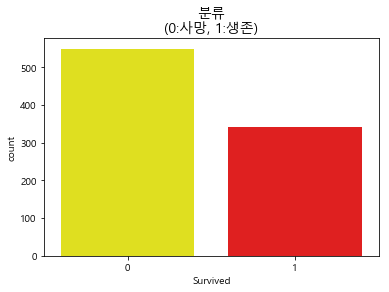

In [11]:
import seaborn as sns
colors=["yellow","red"]
sns.countplot("Survived",data=df,palette=colors)
plt.title("분류\n(0:사망, 1:생존)",fontsize=14)

In [13]:
from sklearn.model_selection import train_test_split
train_cols=df.columns[0:6]
X=df[train_cols] #독립변수
y=df["Survived"] #종속변수

In [14]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=["Survived"])
df2=pd.concat([X_samp,y_samp],axis=1)

Text(0.5, 1.0, '분류\n(0:사망, 1:생존)')

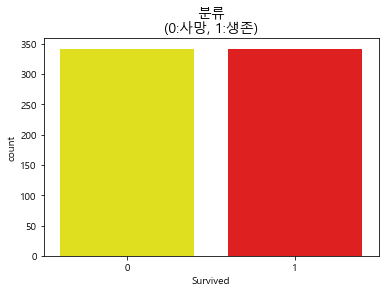

In [15]:
colors=["yellow","red"]
sns.countplot("Survived",data=df2,palette=colors)
plt.title("분류\n(0:사망, 1:생존)",fontsize=14)

In [16]:
train_cols=df.columns[0:6]
X=X_samp[train_cols]
y=y_samp["Survived"]

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#전체 데이터셋을 학습용:검증용 8:2로 구분
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
#트리 모형 생성
model=DecisionTreeClassifier(random_state=0)
#모형 훈련(학습)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [18]:
print(model.score(X_train,y_train)) #학습용 데이터셋의 예측 정확도
print(model.score(X_test,y_test)) #검증용 데이터셋의 예측 정확도

0.9817184643510055
0.8029197080291971


In [26]:
#과적합(over fitting) 문제를 해결하기 위해 최대 단계를 3으로 설정
model=DecisionTreeClassifier(max_depth=5,random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [27]:
#과적합이 다소 해소됨
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8354661791590493
0.8102189781021898


In [28]:
#오분류표(혼동행렬) 출력
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test,pred)
cm

array([[54, 18],
       [ 8, 57]], dtype=int64)

In [29]:
df_cm=pd.DataFrame(cm,index=[0,1],columns=[0,1])
df_cm

,0,1
0,54,18
1,8,57


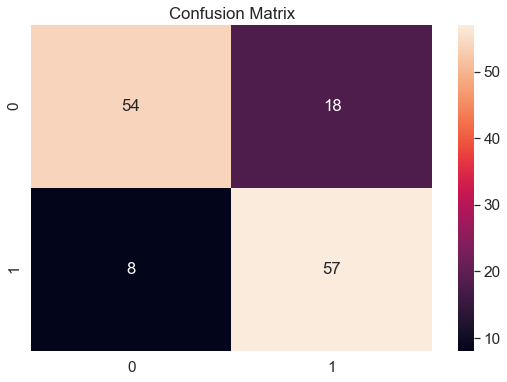

In [30]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm,annot=True)

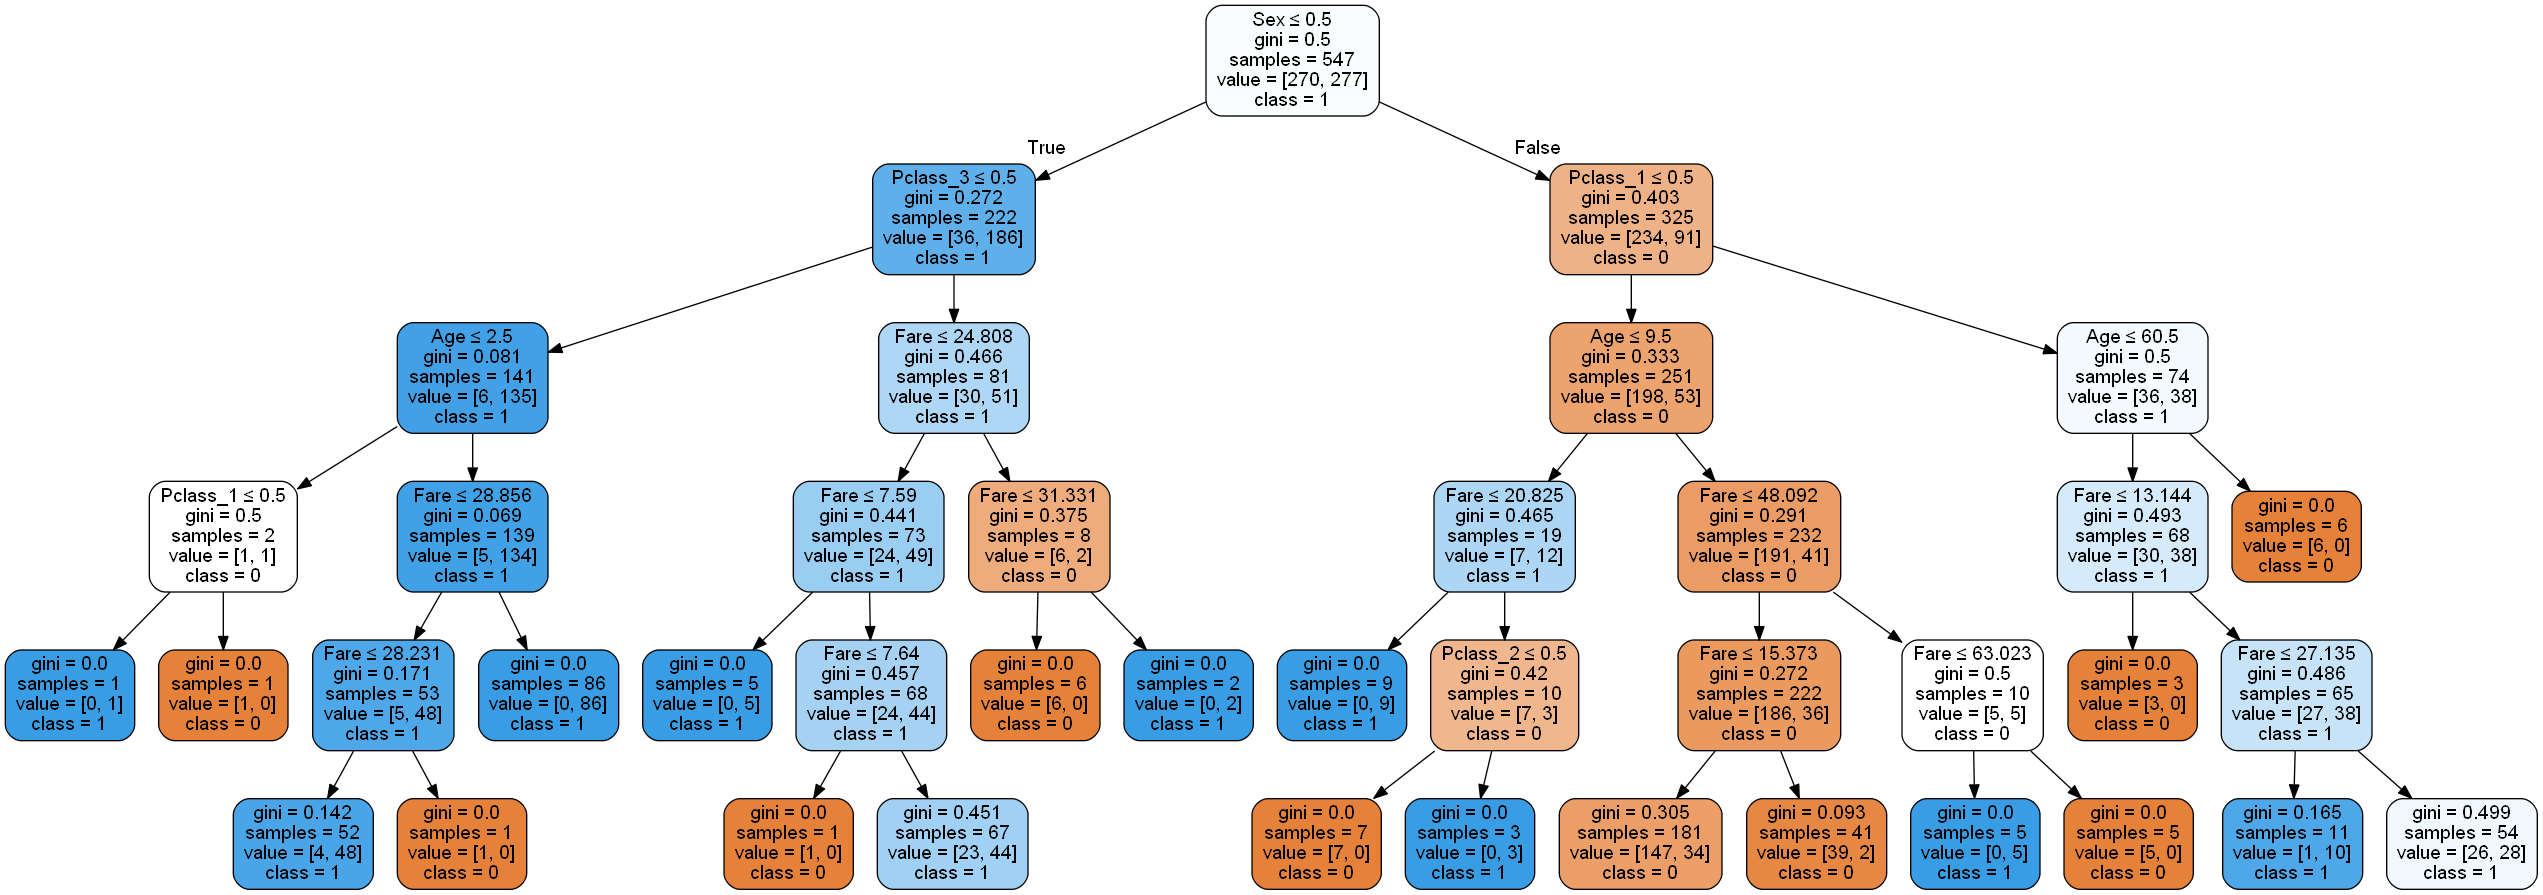

In [32]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
import os
os.environ["PATH"] += os.pathsep+"c:/Program Files (x86)/Graphviz2.38/bin"

#트리 그래프 출력
dot_data=export_graphviz(model, out_file=None,
    feature_names=train_cols,class_names=["0","1"],filled=True,
    rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

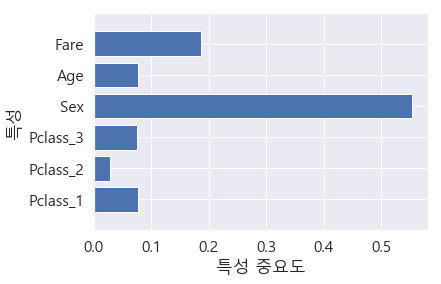

In [33]:
import numpy as np
rc("font",family=font_name)
#특성의 중요도에 대한 그래프 출력
def plot_tree(model):
    n_features=X.shape[1] #독립변수의 갯수
    plt.barh(range(n_features),model.feature_importances_,
             align="center")
    plt.yticks(np.arange(n_features),train_cols)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)
    
plot_tree(model)    

In [34]:
from sklearn.ensemble import RandomForestClassifier
#100개의 트리로 구성된 랜덤포레스트 모형 생성
forest=RandomForestClassifier(n_estimators=100,random_state=10)
#모형 훈련(학습)
forest.fit(X_train,y_train)
#예측 정확도
print(forest.score(X_train,y_train))
print(forest.score(X_test,y_test))

0.9817184643510055
0.8029197080291971


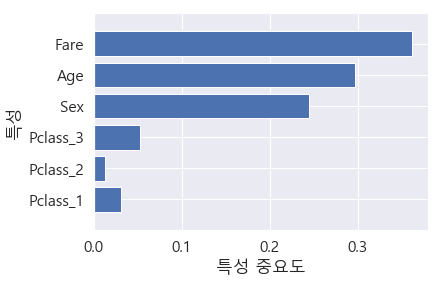

In [35]:
#랜덤포레스트의 특성 중요도
plot_tree(forest)